In [1]:
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

fontpath = '../bigdata anlysis II/src/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
matplotlib.font_manager._rebuild()

### 회귀분석이란?
 - 독립변수(X)와 종속변수(Y) 간의 관계를 찾아내는 것이다.
 - 방정식의 계수 w와 b를 잘 정하는 것으로 표현할 수 있다.

# Step1. 탐색: 프로야구 연봉 데이터 살펴보기

#### * 프로야구 연봉 데이터셋의 기초정보 출력하기

In [2]:
import pandas as pd
import numpy as np

pitcher_file_path = "data/picher_stats_2017.csv" # 던지는 사람
batter_file_path = "data/batter_stats_2017.csv" # 치는 사람

pitcher = pd.read_csv(pitcher_file_path)
batter = pd.read_csv(batter_file_path)

pitcher.head(3)

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000


In [3]:
print(pitcher.columns); print();
print(pitcher.shape)

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

(152, 22)


- 데이터셋은 총 152개이며, 22개의 feature로 구성되어 있다.

In [4]:
batter.head(3)

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,...,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,연봉(2018),연봉(2017)
0,최정,SK,130,527,430,136,46,89,113,70,...,1,0.316,0.316,0.427,0.684,1.111,0.442,7.30,120000,120000
1,최형우,KIA,142,629,514,176,26,98,120,96,...,0,0.362,0.342,0.450,0.576,1.026,0.430,7.20,150000,150000
2,박건우,두산,131,543,483,177,20,91,78,41,...,20,0.39,0.366,0.424,0.582,1.006,0.424,7.04,37000,19500


#### * 연봉에 대한 정보

In [5]:
print("pitcher의 연봉(2018)")
print(pitcher['연봉(2018)'].describe()); print()

print("batter의 연봉(2018)")
print(batter['연봉(2018)'].describe())

pitcher의 연봉(2018)
count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

batter의 연봉(2018)
count       191.000000
mean      20625.654450
std       31978.855209
min        2700.000000
25%        4200.000000
50%        7500.000000
75%       25000.000000
max      250000.000000
Name: 연봉(2018), dtype: float64


<AxesSubplot:title={'center':"batter's pay(2018)"}>

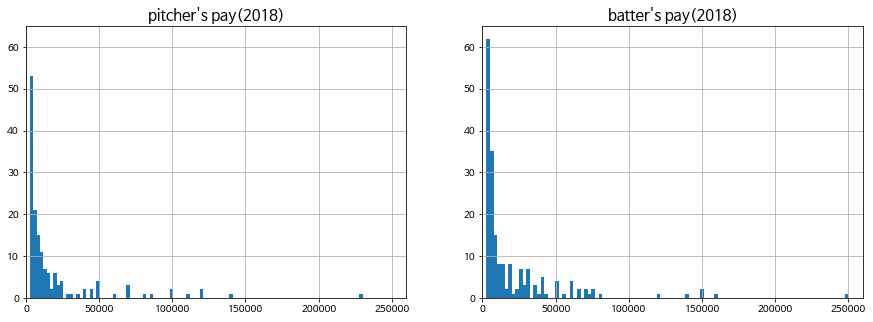

In [6]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.ylim(0,65); plt.xlim(0,260000)
plt.title("pitcher's pay(2018)", fontsize=15)
pitcher['연봉(2018)'].hist(bins=100)

plt.subplot(1,2,2)
plt.ylim(0,65); plt.xlim(0,260000)
plt.title("batter's pay(2018)", fontsize=15)
batter['연봉(2018)'].hist(bins=100)

<AxesSubplot:title={'center':"batter's pay(2018)"}>

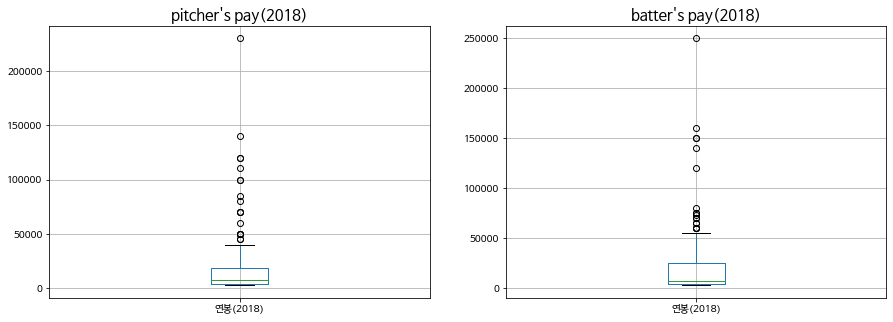

In [7]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title("pitcher's pay(2018)", fontsize=15)
pitcher.boxplot(column=['연봉(2018)'])

plt.subplot(1,2,2)
plt.title("batter's pay(2018)", fontsize=15)
batter.boxplot(column=['연봉(2018)'])

- 연봉의 분포를 살펴보았을 때, '수십억대 연봉'을 받는 프로 선수는 별로 많지 않으며 5억원 미만의 연봉이 일반적인 것으로 보인다. (단위:만 원)

#### * 회귀 분석에 사용할 피처 알아보기
- 선수명과 팀명과 같은 그래프로 표현할 수 없는 feature를 제외하고 모든 수치형 분포에 대한 시각화를 진행한다.

In [8]:
pitcher.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

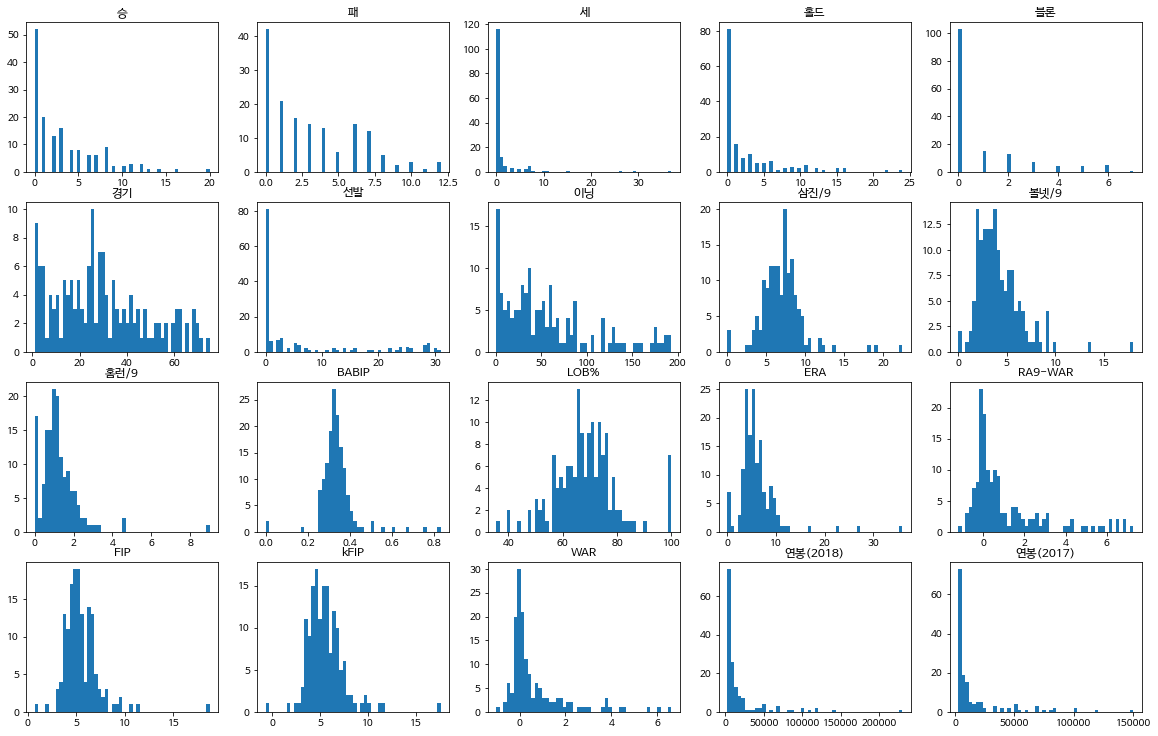

In [9]:
df_pitcher_features = pitcher[['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)']]

def plot_hist_each_column(df):
    plt.rcParams['figure.figsize'] = [20, 16]
    fig = plt.figure(1)
    
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5,5,i+1)
        plt.hist(df[df.columns[i]], bins=50)
        ax.set_title(df.columns[i])
    plt.show()
    
plot_hist_each_column(df_pitcher_features)

- 몇명 feature는 불균형한 분포를 가지고 있는 것으로 알고 있다.
- '홈런/9' feature의 x축 범위는 0 ~ 8 사이인 반면, '이닝' feature의 x축 범위는 0 ~ 200 사이로 각 feature 간의 단위가 다르다.  
따라서 feature의 정규화 또는 스케일링이 필요하다.

### feature의 정규화
- ex) 키와 몸무게를 통한 나이를 예측하는 회귀 분석  
같은 단위라고 할 때 키가 몸무게보다 값이 크므로 키를 나타내는 상수에 따라 나이가 더 큰 영향을 받을 수 있다.  
따라서, 키를 0 ~ 1 사이의 값으로 표현하고, 몸무게도 0 ~ 1 사이의 값으로 표현하는 feature Scaling이 필요하다.
- feature Scaling  
feature들의 단위를 0 ~ 1사이 혹은 상대적 값을 표현할 수 있는 수치로 맞춰주는 것이 피처 스케일링이다.

# Step2. 인사이트의 발견: 탐색과 시각화하기

#### * 두 피처간 상관계수 구하기

#### * 여러 피처간 상관계수 분석하기

- total_litres_of_pure_alcohol 피처가 대체적으로 모든 피처와 상관관계가 있는 것으로 보아  
특히 beer_servings와 연관성이 많아보인다.

# Step3. 데이터 전처리: 전처리 함수 사용하기

#### * 결측데이터 전처리하기

#### * 전체 대륙 중에서 OT가 차지하는 비율을 파이차트로 시각화하기

#### * agg() 함수를 이용해 대륙별 spirit_servings의 통계적 정보 분석하기

#### * 전체 평균보다 많은 알고올을 섭취하는 대륙 구하기

#### * 평균 beer_servings가 가장 높은 대륙은 어디일까?

# Step4. 탐색적 분석: 스무고개로 개념적 탐색 분석하기 

#### * 아프리카와 유럽 간의 맥주 소비량 차이 검정하기

- 등분산을 가정하는 경우와 가정하지 않는 경우를 다 계산하는 이유  
 등분산일 때와 등분산이 아닐 경우 t-검정 통계량을 계산하는 방식이 달라지기 때문에 보통 t-test 전에 등분산 검정을 한다.  
   
   
- 등분산을 가정한 경우와 가정하지 않은 경우 모두 p-value가 0.000이하로 나타났다.
- 따라서 귀무가설:두 집단의 평균이 같다 -> 기각 -> 아프리카와 유럽 간의 맥주 소비량은 통계적으로 유의미하다.  

=> 그렇지만 여기 두 집단의 데이터 크기도 다르고, 각각의 크기 또한 크지 않기 때문에 실제로 통계적인 의미를 가지는 검정으로   보기는 어렵다.

#### * '대한민국은 얼마나 술을 독하게 마시는 나라일까' 탐색하기

#### * 국가별 술 소비량 대비 알코올 비율을 순위별로 시각화하기